# Predicting Fat Content in Meat Samples by Infrared Absorbance

This is a project aimed at predicting (classifying) the fat content in meat samples using infrared absorbance data (functional format), given by a Tecator analysis unit. The dataset was provided by scikit-fda. 

## Part 1: Import

In [1]:
import skfda # scikit fda module

import numpy as np

In [2]:
# Tecator dataset
X, y = skfda.datasets.fetch_tecator(return_X_y=True, as_frame=True)

Take a look at the basic format of data and target

In [15]:
X

,spectrometric curves
0,Data set: [[[2.61776] [2.61814] [2.6185...
1,Data set: [[[2.83454] [2.83871] [2.8428...
2,Data set: [[[2.58284] [2.58458] [2.5862...
3,Data set: [[[2.82286] [2.8246 ] [2.8263...
4,Data set: [[[2.78813] [2.78989] [2.7916...
...,...
210,Data set: [[[3.14626] [3.15166] [3.1570...
211,Data set: [[[2.57992] [2.5804 ] [2.5809...
212,Data set: [[[2.56875] [2.56923] [2.5698...
213,Data set: [[[2.65884] [2.65943] [2.6602...


In [16]:
y

,fat,water,protein
0,22.5,60.5,16.7
1,40.1,46.0,13.5
2,8.4,71.0,20.5
3,5.9,72.8,20.7
4,25.5,58.3,15.5
...,...,...,...
210,31.3,53.4,15.3
211,33.8,51.6,13.8
212,35.5,50.3,13.2
213,42.5,44.9,12.0


In [14]:
type(X)

pandas.core.frame.DataFrame

In [17]:
fd = X.iloc[:, 0].values # both X and y are Pandas dataframe. Need to extract the Functional Data out
fat = y['fat'].values # same, crunch the dataframe format and leave the values

In [18]:
y['fat']

0      22.5
1      40.1
2       8.4
3       5.9
4      25.5
       ... 
210    31.3
211    33.8
212    35.5
213    42.5
214    47.8
Name: fat, Length: 215, dtype: float64

In [19]:
y['fat'].values

array([22.5, 40.1,  8.4,  5.9, 25.5, 42.7, 42.7, 10.6, 19.9, 19.9, 46. ,
        0.9,  2.9,  3.5,  4. ,  5.2,  5.6,  6.3,  7.2,  7.8,  7.9,  9.2,
        9.3, 10.2, 12.5, 13.5, 13.5, 14.6, 14.6, 16.3, 18.6, 20.9, 21.2,
       25.1, 26.5, 27.8, 29.7, 30.4, 31.5, 35.2, 35.8, 43.8, 48.2, 48.5,
       49.1,  8.2, 11. ,  0.9,  3.6,  3.9,  4. ,  5.1,  5.2,  5.2,  5.6,
        5.6,  6. ,  6.4,  6.4,  6.4,  6.6,  6.6,  6.7,  6.8,  6.9,  7. ,
        7.2,  7.2,  7.2,  7.7,  7.7,  7.7,  8.1,  8.4,  8.5,  9.6,  9.7,
        9.7, 10.1, 10.1, 10.1, 10.9, 10.9, 11. , 11.2, 11.2, 11.7, 12.7,
       13.8, 14. , 15.4, 15.5, 15.7, 16.4, 16.4, 16.4, 17.2, 17.4, 17.6,
       18.2, 18.3, 18.8, 20.6, 21.5, 23. , 24.9, 26. , 26.1, 27.3, 27.8,
       28.1, 28.7, 28.8, 28.9, 29.2, 29.7, 30.4, 31.5, 32. , 32.2, 34.2,
       35.1, 35.2, 36.2, 36.5, 37.8, 44.7, 45. , 45.7, 29.8,  5.9, 46. ,
        1.4,  4.6,  6.4,  8.5, 11. , 13.5, 17. , 22.4, 27.9, 31.5, 46.5,
        6.1,  2. ,  4.7,  5.3,  6. ,  6.4,  6.8,  7

## Part 2 Visualization

Display the functional data. Here we convert the target to categorical for better intuition.

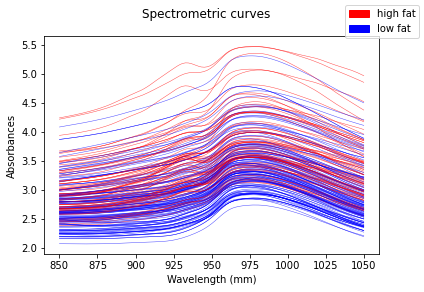

In [20]:
low_fat = fat < 20
labels = np.full(fd.n_samples, 'high fat')
labels[low_fat] = 'low fat'
colors = {'high fat': 'red',
          'low fat': 'blue'}

fig = fd.plot(group=labels, group_colors=colors,
              linewidth=0.5, alpha=0.7, legend=True)

It looks like that high fat foods have hight absorbances in general which makes sense. But just how far do they differ?

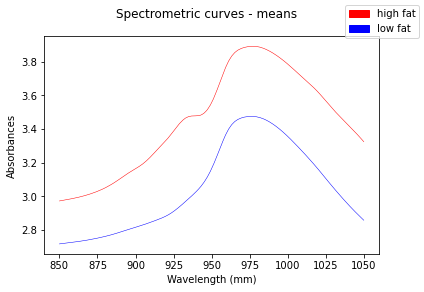

In [22]:
mean_low = skfda.exploratory.stats.mean(fd[low_fat])
mean_high = skfda.exploratory.stats.mean(fd[~low_fat])

means = mean_high.concatenate(mean_low)

means.dataset_name = fd.dataset_name + ' - means'
means.plot(group=['high fat', 'low fat'], group_colors=colors,
           linewidth=0.5, legend=True);

There seems to be a gap of ~0.2 between the two mean curves. We also observe that around 925nm, the curve for high fat food vary more abruptly. Here we plot the derivatives:

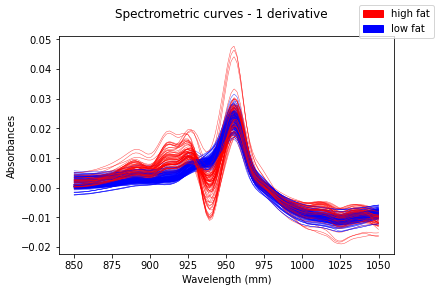

In [23]:
fdd = fd.derivative()
fig = fdd.plot(group=labels, group_colors=colors,
               linewidth=0.5, alpha=0.7, legend=True)

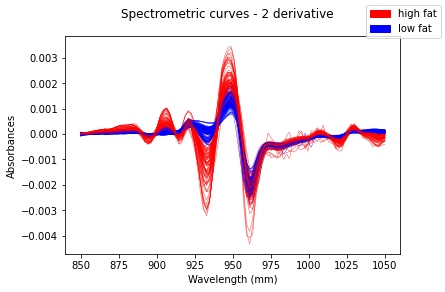

In [24]:
fd2d = fd.derivative(order=2)
fig = fd2d.plot(group=labels, group_colors=colors,
               linewidth=0.5, alpha=0.7, legend=True)

## Part 3: Principal Component Analysis

PCA is usually used to find the dominant mode of VARIATION in the data, usually after subtracting the mean from each observation.

We want to know how many of these modes are needed to approximate the original data; keep only these few modes can also help to improve the signal-to-noise ratio of data.

PCA can be applied onto the raw (discretized) data directly, or onto the representation by a basis function (Spline, etc.) In practice, it's usually just applied directly. Results are largely similar.

In [31]:
from skfda.exploratory.visualization import plot_fpca_perturbation_graphs
from skfda.preprocessing.dim_reduction.projection import FPCA

import matplotlib.pyplot as plt

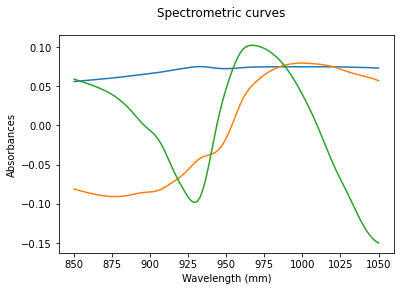

In [41]:
# Keep a FPCA object of 3 components (3 most predominant models)
fpca_discretized = FPCA(n_components=3)
fpca_discretized.fit(fd)
fig = fpca_discretized.components_.plot();

What does it tell us?

1) PC 1: the main type of variation. It just means that the functional data in general stray from the mean for ~ 0.05

2) PC 2: This is applied on top of PC 1. Note that the left half shows negative value, while the right half positive. This means that the curves are more concentrated on the left side and more dispersed on the right side (as can be seen from the original plot)

3) PC 3: This seems to be the difference between low fat meat and high fat meat. The trough at 925mm matches our previous observation.

Next steps: 
1) Plot curves separately as subplots, with the percentages of relevance attached (just like the ones seen in R)

2) Reconstruct time series from the first 3 PCs and compare with the original data

## Part 4: Predictive Classification

Skfda has built in ML models that work just like regular ML. We can take advantage of this and do some predictions. Here we take the absorbance spectra of meat and try to predict their fat content

In [63]:
import skfda
from skfda.ml.classification import KNeighborsClassifier

from sklearn.model_selection import (train_test_split, GridSearchCV,
                                     StratifiedShuffleSplit, KFold)

import matplotlib.pyplot as plt
import numpy as np

In [45]:
len(fd)

215

In [46]:
len(labels)

215

In [47]:
X_train, X_test, y_train, y_test = train_test_split(fd, labels, test_size=0.25,
                                                    stratify=labels, random_state=0)

In [48]:
len(X_train)

161

In [49]:
# knn is built in skfda directly

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [50]:
pred = knn.predict(X_test)
print(pred)

['low fat' 'low fat' 'low fat' 'low fat' 'high fat' 'high fat' 'high fat'
 'low fat' 'low fat' 'high fat' 'low fat' 'high fat' 'low fat' 'low fat'
 'low fat' 'low fat' 'low fat' 'low fat' 'high fat' 'low fat' 'low fat'
 'high fat' 'low fat' 'high fat' 'low fat' 'low fat' 'low fat' 'high fat'
 'low fat' 'low fat' 'low fat' 'low fat' 'low fat' 'low fat' 'low fat'
 'low fat' 'high fat' 'low fat' 'low fat' 'low fat' 'high fat' 'low fat'
 'low fat' 'high fat' 'low fat' 'high fat' 'low fat' 'low fat' 'high fat'
 'high fat' 'low fat' 'low fat' 'low fat' 'high fat']


In [51]:
score = knn.score(X_test, y_test)
print(score)

0.7592592592592593


Accuracy of prediction is fair, but not stellar. Clearly the relation between absorbtion spectra and fat content is not that straightforward!

In [53]:
# Only odd numbers, to prevent ties
param_grid = {'n_neighbors': np.arange(1, 12, 2)}


knn = KNeighborsClassifier()

# Perform grid search with cross-validation
ss = StratifiedShuffleSplit(n_splits=5, test_size=.25, random_state=0)
gscv = GridSearchCV(knn, param_grid, cv=ss)
gscv.fit(fd, labels)


print("Best params:", gscv.best_params_)
print("Best score:", gscv.best_score_)

Best params: {'n_neighbors': 1}
Best score: 0.825925925925926


What would, instead, be a better model to fit somewhat chaotic functional data like this?

## Part 5: Predictive Regression

Since our original target was the numerical level of fat content, not the label we invented, we should test the effectiveness of regression on the original label.

In [54]:
from skfda.ml.regression import KNeighborsRegressor

In [55]:
len(y)

215

In [57]:
X_train, X_test, y_train, y_test = train_test_split(fd, y, test_size=0.25,
                                                     random_state=0)

In [58]:
knn = KNeighborsRegressor(weights='distance')
knn.fit(X_train, y_train)

KNeighborsRegressor(weights='distance')

In [59]:
pred = knn.predict(X_test)
print(pred)

[[11.15266171 70.23332838 17.83369987]
 [30.4        50.3        19.2       ]
 [13.19427108 67.80996519 18.25547567]
 [21.76359416 59.69045692 17.89582405]
 [43.49225979 43.85968807 12.93092402]
 [10.78624097 69.28486047 19.3892892 ]
 [ 6.66816702 72.56672727 20.20019056]
 [13.5        64.6        16.7       ]
 [42.87285891 43.85750175 13.32488946]
 [20.96827314 60.87854742 18.23413694]
 [ 7.98077713 72.23827442 19.38017618]
 [ 7.28697069 72.0329078  20.21302191]
 [18.36163132 63.44937969 17.16659847]
 [20.78506736 61.31914101 16.53190745]
 [16.84419713 63.09847758 17.87942948]
 [17.         63.6        19.7       ]
 [41.92469962 45.2938869  13.03835275]
 [ 2.9        72.7        21.7       ]
 [21.76969212 61.04372061 16.95079248]
 [20.25045818 60.63754706 18.27731658]
 [36.03722821 49.08940755 14.39779797]
 [31.5        52.5        16.        ]
 [22.80047546 60.2982247  16.5358628 ]
 [ 7.53232931 72.03308915 19.80362754]
 [ 2.         75.6        21.4       ]
 [14.34492761 65.39031176

We need to plot the predicted values with the labeled values to see how good the prediction is

Text(0, 0.5, 'Prediction')

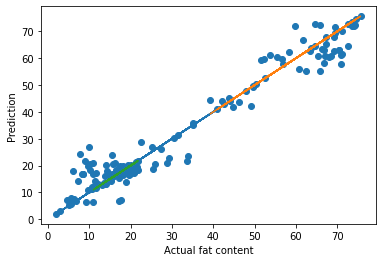

In [60]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(y_test, pred)
ax.plot(y_test, y_test)
ax.set_xlabel("Actual fat content")
ax.set_ylabel("Prediction")

In [61]:
score = knn.score(X_test, y_test)
print(score)

0.6546545488080568


Surprisingly, it's just not that bad! Now again let's do a grid search to see what't the best neighbor count we should use for our prediction.

In [65]:
param_grid = {'n_neighbors': np.arange(1, 12, 2),
              'weights': ['uniform', 'distance']}


knn = KNeighborsRegressor(metric='euclidean', multivariate_metric=True)
gscv = GridSearchCV(knn, param_grid, cv=KFold(n_splits=3,
                                              shuffle=True, random_state=0))
gscv.fit(fd, y)

print("Best params", gscv.best_params_)
print("Best score", gscv.best_score_)

Best params {'n_neighbors': 3, 'weights': 'distance'}
Best score 0.5481781305760727
